<a href="https://colab.research.google.com/github/SophinaLuitel/Comp710Group5/blob/main/AEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import wave
import pylab
from pathlib import Path
from scipy import signal
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def extract_label_from_filename(filename):
    tem = filename.split("/", -1)

    if tem[0][2:5] == "gio":
        return 1
    elif tem[0][2:5] == "tri":
        return 0
    elif tem[0][2:5] == "ans":
        return 2
    elif tem[0][2:5] == "dis":
        return 3
    elif tem[0][2:5] == "rab":
        return 4


In [ ]:
def extract_gender_rom_filename(filename):
    tem = filename.split("/", -1)

    if tem[0][0] == 'f':
        return 1
    elif tem[0][0] == 'm':
        return 0


In [ ]:
from PIL import Image
import os
import numpy as np

spectrogram_images = []
labels = []
gender=[]
spectrogram_height = 32
spectrogram_width = 32
BATCH_SIZE = 16
channels = 3

output_dir = '/content/drive/MyDrive/wav_corpus/png44emo/'
INPUT_DIR = '/content/drive/MyDrive/wav_corpus/png44emo/'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for filename in os.listdir(INPUT_DIR):
    if filename.endswith(".png"):
        img_path = os.path.join(INPUT_DIR, filename)  # Corrected the path
        img = Image.open(img_path)
    #    print(img)

        img = img.resize((spectrogram_width, spectrogram_height))  # Resize if needed
     #   img = img.convert('RGB')  # Convert to RGB if needed
        img_array = np.array(img)
        spectrogram_images.append(img_array)

        label = extract_label_from_filename(filename)  # Implement this based on your naming convention
        labels.append(label)
        gen= extract_gender_rom_filename(filename)
        gender.append(gen)

spectrogram_images = np.array(spectrogram_images,dtype=np.float32)
labels = np.array(labels)
gender=np.array(gender)
#spectrogram_images /= 255.0 # Assuming original pixel values are in the range
# [0, 255]

# Verify the shape and range of the normalized images
print("Normalized Image Shape:", spectrogram_images.shape)
#print("Min Pixel Value:", np.min(spectrogram_images))
#print("Max Pixel Value:", np.max(spectrogram_images))


Normalized Image Shape: (1115, 256, 256, 3)


In [ ]:
from PIL import Image
import os
import numpy as np
import random
from scipy.ndimage import shift
from skimage.util import random_noise

# Directory paths
INPUT_DIR = '/content/drive/MyDrive/wav_corpus/png16emo/'
OUTPUT_DIR = '/content/drive/MyDrive/wav_corpus/png16emo/wav_emo_gio_tri_augmented/'

# Create output directory if it doesn't exist
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# Image properties
spectrogram_height = 256
spectrogram_width = 256
channels = 3

# Augmentation parameters
num_augmentations = 1# Number of augmentations per original sample

# Function to extract label from filename (implement this based on your naming convention)
#def extract_label_from_filename(filename):
    # Example implementation
 #   return filename.split('_')[0]

# Augmentation functions
def shift_spectrogram(spectrogram, shift_range=2):
    shift_x = random.randint(-shift_range, shift_range)
    shift_y = random.randint(-shift_range, shift_range)
    return shift(spectrogram, shift=(shift_y, shift_x, 0))

def add_noise_to_spectrogram(spectrogram, noise_level=0.001):
    return random_noise(spectrogram, mode='gaussian', var=noise_level)

def scale_spectrogram(spectrogram, scale_range=0.2):
    scale_factor = 1 + random.uniform(-scale_range, scale_range)
    return np.clip(spectrogram * scale_factor, 0, 1)

def rotate_spectrogram(spectrogram, angle_range=10):
    angle = random.uniform(-angle_range, angle_range)
    return np.array(Image.fromarray((spectrogram * 255).astype(np.uint8)).rotate(angle)) / 255.0

def invert_spectrogram(spectrogram):
    return 1.0 - spectrogram

# Load and augment spectrogram images
spectrogram_images = []
labels = []
gender=[]

for filename in os.listdir(INPUT_DIR):

    if filename.endswith(".png"):
       # print(filename)
        img_path = os.path.join(INPUT_DIR, filename)
        img = Image.open(img_path)
        img = img.resize((spectrogram_width, spectrogram_height))
        img = img.convert('RGB')


        img_array = np.array(img) / 255.0  # Normalize image
        spectrogram_images.append(img_array)
        label = extract_label_from_filename(filename)
        labels.append(label)
        gen= extract_gender_rom_filename(filename)
        gender.append(gen)

        # Apply augmentations
        for _ in range(num_augmentations):
            aug_img = img_array.copy()
        #    aug_img = shift_spectrogram(aug_img)
            aug_img = add_noise_to_spectrogram(aug_img)
         #   aug_img = scale_spectrogram(aug_img)
            aug_img = rotate_spectrogram(aug_img)
         #   aug_img = invert_spectrogram(aug_img)

            spectrogram_images.append(aug_img)
            labels.append(label)
            gender.append(gen)


            # Save augmented images if needed
        #    aug_img_path = os.path.join(OUTPUT_DIR, f'aug_{_}_{filename}')
        #    aug_img_pil = Image.fromarray((aug_img * 255).astype(np.uint8))
        #    aug_img_pil.save(aug_img_path)

spectrogram_images = np.array(spectrogram_images, dtype=np.float32)
labels = np.array(labels)
gender=np.array(gender)
#spectrogram_images /= 255.0 # Assuming original pixel values are in the range

# Verify the shape and range of the normalized images
print("Normalized Image Shape:", spectrogram_images.shape)
#print("Min Pixel Value:", np.min(spectrogram_images))
#print("Max Pixel Value:", np.max(spectrogram_images))


Normalized Image Shape: (2230, 256, 256, 3)


In [ ]:
spectrogram_images /= 255.0 # Assuming original pixel values are in the range

In [ ]:
#  image information
print("Number of images:", len(spectrogram_images))
print("Number of labels:", len(labels))

spectrogram_images = np.array(spectrogram_images)
labels = np.array(labels)

# information after array conversion
print("Shape of spectrogram_images array:", spectrogram_images.shape)
print("Shape of labels array:", labels.shape)

Number of images: 2230
Number of labels: 2230
Shape of spectrogram_images array: (2230, 256, 256, 3)
Shape of labels array: (2230,)


In [ ]:
# Define the two emotions you want to keep
emotions_to_keep = [0, 1]  # Replace with the actual label values for the two emotions

# Filter the spectrogram images and labels for the two emotions
filtered_indices = np.isin(labels, emotions_to_keep)
spectrogram_images = spectrogram_images[filtered_indices]
labels = labels[filtered_indices]
gender = gender[filtered_indices]

print(f"Filtered spectrograms shape: {spectrogram_images.shape}")
print(f"Filtered labels shape: {labels.shape}")
print(f"Filtered gender shape: {gender.shape}")


Filtered spectrograms shape: (1482, 32, 32, 3)
Filtered labels shape: (1482,)
Filtered gender shape: (1482,)


In [ ]:
print(spectrogram_images.shape)
print(labels.shape)
# Assuming y_labels is a NumPy array or list of labels
labels1, counts = np.unique(labels, return_counts=True)

# Print the counts for each label
for label, count in zip(labels1, counts):
    print(f"Label {label}: {count} data points")

(2230, 256, 256, 3)
(2230,)
Label 0: 508 data points
Label 1: 480 data points
Label 2: 442 data points
Label 3: 336 data points
Label 4: 464 data points


In [ ]:
# Separate the data based on gender
male_indices = np.where(gender == 0)
female_indices = np.where(gender == 1)

male_spectrograms = spectrogram_images[male_indices]
male_labels = labels[male_indices]

female_spectrograms = spectrogram_images[female_indices]
female_labels = labels[female_indices]

# Check the sizes of the resulting arrays
print(f"Male spectrograms shape: {male_spectrograms.shape}")
print(f"Male labels shape: {male_labels.shape}")
print(f"Female spectrograms shape: {female_spectrograms.shape}")
print(f"Female labels shape: {female_labels.shape}")

Male spectrograms shape: (1156, 256, 256, 3)
Male labels shape: (1156,)
Female spectrograms shape: (1074, 256, 256, 3)
Female labels shape: (1074,)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Split the data into training and temporary validation sets
train_images, temp_images, train_labels, temp_labels = train_test_split(spectrogram_images, labels, test_size=0.2, random_state=42)

# Split the temporary validation set into validation and test sets
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

# Print the shapes of the resulting datasets
print("Train set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape, val_labels.shape)
print("Test set shape:", test_images.shape, test_labels.shape)
# One-hot encode the labels
train_labels = to_categorical(train_labels, num_classes=5)
val_labels = to_categorical(val_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

Train set shape: (1784, 256, 256, 3) (1784,)
Validation set shape: (223, 256, 256, 3) (223,)
Test set shape: (223, 256, 256, 3) (223,)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Split the data into training and temporary validation sets
mtrain_images, mtemp_images, mtrain_labels, mtemp_labels = train_test_split(male_spectrograms, male_labels, test_size=0.2, random_state=42)

# Split the temporary validation set into validation and test sets
mval_images, mtest_images, mval_labels, mtest_labels = train_test_split(mtemp_images, mtemp_labels, test_size=0.5, random_state=42)

# Print the shapes of the resulting datasets
print("Train set shape:", mtrain_images.shape, mtrain_labels.shape)
print("Validation set shape:", mval_images.shape, mval_labels.shape)
print("Test set shape:", mtest_images.shape, mtest_labels.shape)
# One-hot encode the labels
mtrain_labels = to_categorical(mtrain_labels, num_classes=5)
mval_labels = to_categorical(mval_labels, num_classes=5)
mtest_labels = to_categorical(mtest_labels, num_classes=5)

Train set shape: (924, 256, 256, 3) (924,)
Validation set shape: (116, 256, 256, 3) (116,)
Test set shape: (116, 256, 256, 3) (116,)


In [ ]:
import random

from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Nadam,Adam
import tensorflow as tf
from tensorflow.keras import regularizers

# Set random seed for TensorFlow
tf.random.set_seed(42)

# Set random seed for numpy (used by TensorFlow internally)
np.random.seed(42)
# Set random seed for Python's built-in random module
random.seed(42)

# Define the CNN model
model = tf.keras.Sequential([

    tf.keras.layers.Input(shape=(spectrogram_height,spectrogram_width,3)),

    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', padding='valid',kernel_regularizer=regularizers.l2(l2=2e-2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='valid',kernel_regularizer=regularizers.l2(l2=2e-2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='valid',kernel_regularizer=regularizers.l2(l2=2e-2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='valid',kernel_regularizer=regularizers.l2(l2=2e-2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

   # tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='valid',kernel_regularizer=regularizers.l2(l2=2e-2)),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.MaxPooling2D((2, 2)),
    #tf.keras.layers.Dropout(0.2),

    #flatten layer to transition from convolution to dense layer
    tf.keras.layers.Flatten(),
    #fully connected layers with the dropout for regularization
    tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-2,l2=2e-2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])
learning_rate=1e-4
optimizer=Adam(learning_rate=learning_rate)
# Compile the model
#optimizer = 'adam'
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping to prevent overfitting
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-4)
# Train the model
history=model.fit(mtrain_images, mtrain_labels, epochs=100, batch_size=8, validation_data=(mval_images, mval_labels))

# Evaluate the model
loss, accuracy = model.evaluate(mval_images, mval_labels)
print("Validation accuracy:", accuracy)

Epoch 1/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.2882 - loss: 143.5230 - val_accuracy: 0.1810 - val_loss: 96.9472
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4845 - loss: 82.2288 - val_accuracy: 0.1810 - val_loss: 48.0935
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5158 - loss: 38.8320 - val_accuracy: 0.1810 - val_loss: 23.4357
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5345 - loss: 18.1950 - val_accuracy: 0.1810 - val_loss: 13.3128
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5521 - loss: 10.6710 - val_accuracy: 0.2414 - val_loss: 9.1189
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5421 - loss: 7.8646 - val_accuracy: 0.3879 - val_loss: 7.4245
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5537 - loss: 6.6221 - val_accuracy: 0.5690 - val_loss: 6.0903
Epoch 8/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5845 - loss

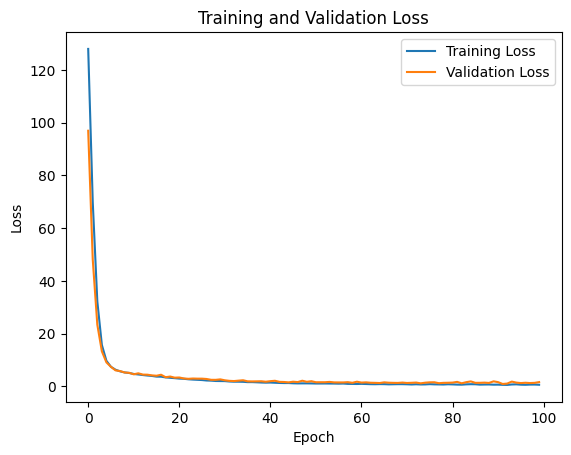

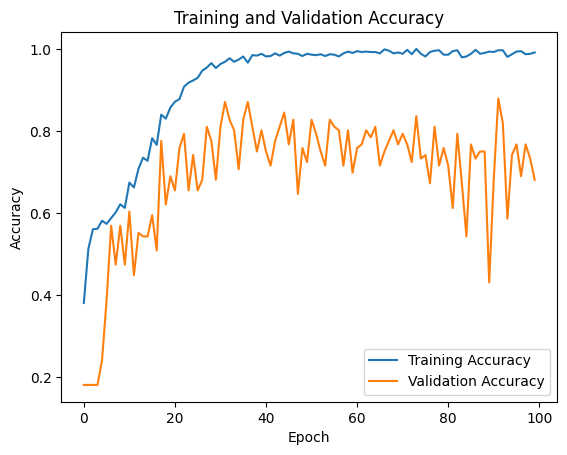

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


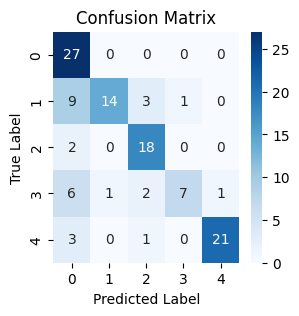

Accuracy for class 0: 100.00%
Accuracy for class 1: 51.85%
Accuracy for class 2: 90.00%
Accuracy for class 3: 41.18%
Accuracy for class 4: 84.00%
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.57      1.00      0.73        27
     Class 1       0.93      0.52      0.67        27
     Class 2       0.75      0.90      0.82        20
     Class 3       0.88      0.41      0.56        17
     Class 4       0.95      0.84      0.89        25

    accuracy                           0.75       116
   macro avg       0.82      0.73      0.73       116
weighted avg       0.81      0.75      0.74       116



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Predict class probabilities and convert them to class labels
probabilities = model.predict(mtest_images)
predicted_classes = np.argmax(probabilities, axis=1)

# Convert one-hot encoded test labels back to class labels
true_classes = np.argmax(mtest_labels, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Print confusion matrix
#print("Confusion Matrix:")
#print(conf_matrix)
# Plot confusion matrix using seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_classes), yticklabels=np.unique(true_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Compute per-class accuracy
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
for i, class_accuracy in enumerate(class_accuracies):
    print(f"Accuracy for class {i}: {class_accuracy * 100:.2f}%")

# Print classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=[f'Class {i}' for i in range(5)]))


In [ ]:
from sklearn.model_selection import train_test_split
BUFFER_SIZE=20
BATCH_SIZE=5

# Assuming 'gender' is a numpy array with gender information corresponding to 'spectrogram_images'
# Split the data into training and temporary validation sets, including gender
gtrain_images, gtemp_images, gtrain_labels, gtemp_labels, gtrain_gender, gtemp_gender = train_test_split(
    spectrogram_images, labels, gender, test_size=0.2, random_state=2890
)

# Split the temporary validation set into validation and test sets, including gender
gval_images, gtest_images, gval_labels, gtest_labels, gval_gender, gtest_gender = train_test_split(
    gtemp_images, gtemp_labels, gtemp_gender, test_size=0.5, random_state=2890
)

# Print the shapes of the resulting datasets
print("Train set shape:", gtrain_images.shape, gtrain_labels.shape, gtrain_gender.shape)
print("Validation set shape:", gval_images.shape, gval_labels.shape, gval_gender.shape)
print("Test set shape:", gtest_images.shape, gtest_labels.shape, gtest_gender.shape)
gtrain_dataset = tf.data.Dataset.from_tensor_slices((gtrain_images, gtrain_labels)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
gval_dataset = tf.data.Dataset.from_tensor_slices((gval_images, gval_labels)).batch(BATCH_SIZE)
gtest_dataset = tf.data.Dataset.from_tensor_slices((gtest_images, gtest_labels)).batch(BATCH_SIZE)



Train set shape: (1185, 32, 32, 3) (1185,) (1185,)
Validation set shape: (148, 32, 32, 3) (148,) (148,)
Test set shape: (149, 32, 32, 3) (149,) (149,)


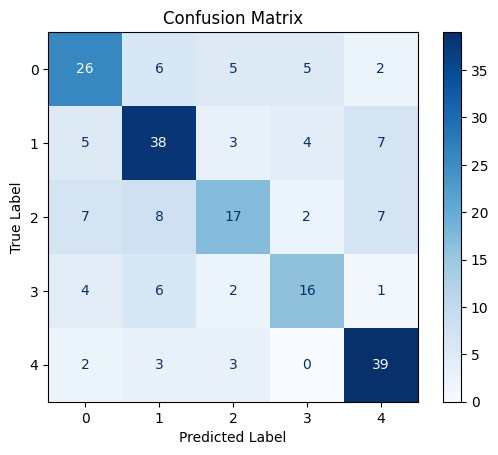

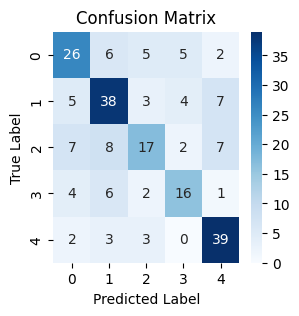

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix data
confusion_matrix = np.array([
    [26,  6,  5,  5,  2],
    [ 5, 38,  3,  4,  7],
    [ 7,  8, 17,  2,  7],
    [ 4, 6,  2, 16,  1],
    [ 2,  3,  3,  0, 39]
])

# Class labels
labels = ['0', '1', '2', '3', '4']

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers


class TransformerEncoder(layers.Layer):
    @tf.function(reduce_retracing=True)
    def __init__(self, num_heads, d_model, dff, dropout_rate=0.1):
        super(TransformerEncoder, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        self.dff = dff
        self.dropout_rate = dropout_rate


        self.mha = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model,kernel_regularizer=regularizers.l2(1e-2))
        self.ffn = tf.keras.Sequential([
            layers.Dense(dff, activation='relu', kernel_regularizer=regularizers.l2(1e-2)),
            layers.Dense(d_model, kernel_regularizer=regularizers.l2(1e-2))
        ])

        self.layer_norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.layer_norm2 = layers.LayerNormalization(epsilon=1e-5)

        self.dropout1 = layers.Dropout(dropout_rate)
        self.dropout2 = layers.Dropout(dropout_rate)

    def call(self, inputs, training=True):
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layer_norm1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layer_norm2(out1 + ffn_output)

        return out2

class Transformer(tf.keras.Model):
    @tf.function(reduce_retracing=True)
    def __init__(self, num_layers, num_heads, d_model, dff, input_image_shape, output_dim, dropout_rate=0.2):
        super(Transformer, self).__init__()
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.d_model = d_model
        self.dff = dff
        self.input_image_shape = input_image_shape
        self.output_dim = output_dim
        self.dropout_rate = dropout_rate

       # self.embedding = layers.Conv2D(filters=d_model, kernel_size=(3, 3),padding='same', activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-2))
        self.embedding = layers.Dense(d_model, activation='relu',kernel_regularizer=regularizers.l2(1e-2))  # Use a Dense layer instead of Conv2D
        self.encoder_layers = [TransformerEncoder(num_heads, d_model, dff, dropout_rate) for _ in range(num_layers)]
        self.flatten = layers.Flatten()
        self.batch_norm1 = BatchNormalization()
        self.dropout = layers.Dropout(dropout_rate)
        self.final_layer = layers.Dense(output_dim, activation='softmax')#,kernel_regularizer=regularizers.l2(2e-2))

    def call(self, inputs, training=True):
        x = self.embedding(inputs)
        for i in range(self.num_layers):
            x = self.encoder_layers[i](x, training=training)
        x = self.flatten(x)
        x = self.batch_norm1(x)
        x= self.dropout(x, training=training)
        return self.final_layer(x)


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Split the data into training and temporary validation sets
mtrain_images, mtemp_images, mtrain_labels, mtemp_labels = train_test_split(male_spectrograms, male_labels, test_size=0.2, random_state=42)

# Split the temporary validation set into validation and test sets
mval_images, mtest_images, mval_labels, mtest_labels = train_test_split(mtemp_images, mtemp_labels, test_size=0.5, random_state=42)

print(len(mtrain_images))
print(len(mval_images))
print(len(mtest_images))
BUFFER_SIZE = 20
BATCH_SIZE = 5

# One-hot encode the labels
mtrain_labels = to_categorical(mtrain_labels, num_classes=5)
mval_labels = to_categorical(mval_labels, num_classes=5)
mtest_labels = to_categorical(mtest_labels, num_classes=5)

# Prepare your data for TensorFlow
mtrain_dataset = tf.data.Dataset.from_tensor_slices((mtrain_images, mtrain_labels)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
mval_dataset = tf.data.Dataset.from_tensor_slices((mval_images, mval_labels)).batch(BATCH_SIZE)
mtest_dataset = tf.data.Dataset.from_tensor_slices((mtest_images, mtest_labels)).batch(BATCH_SIZE)


1387
173
174


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Split the data into training and temporary validation sets
train_images, temp_images, train_labels, temp_labels = train_test_split(spectrogram_images, labels, test_size=0.2, random_state=2890)

# Split the temporary validation set into validation and test sets
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=2890)

print(len(train_images))
BUFFER_SIZE = 20
BATCH_SIZE = 15

# One-hot encode the labels
#mtrain_labels = to_categorical(mtrain_labels, num_classes=5)
#mval_labels = to_categorical(mval_labels, num_classes=5)
#mtest_labels = to_categorical(mtest_labels, num_classes=5)

# Prepare your data for TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(BATCH_SIZE)


1185


In [ ]:
from tensorflow.keras.layers import Input,Dense,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np

# Set random seeds for reproducibility
seed_value = 0
tf.random.set_seed(seed_value)
np.random.seed(seed_value)


# Define input shape for the spectrogram data
spectrogram_height = 32
spectrogram_width = 32
input_shape = (spectrogram_height, spectrogram_width, 3)
#max_position = spectrogram_height*spectrogram_height  # Maximum position in the spectrogram

# Create an input layer for the spectrogram data
input_layer = Input(shape=input_shape)


# Create an instance of the Transformer model
num_layers = 3
num_heads = 6
d_model = 32
dff = 128
output_dim = 5  # Adjust based on your task (e.g., number of classes for classification)
dropout_rate = 0.4

transformer_model = Transformer(
    num_layers=num_layers,
    num_heads=num_heads,
    d_model=d_model,
    dff=dff,
    input_image_shape=input_shape,
    output_dim=output_dim,
    dropout_rate=dropout_rate
)

# Create an instance of the PositionalEncoding layer and apply it to the input
#pos_encoding_layer = PositionalEncoding(max_position=16, d_model=3)

#input_with_pos_encoding = pos_encoding_layer(input_layer)
# Build the model
output = transformer_model(input_layer)
# Add Batch Normalization after Dense layers in the Transformer model
#output_normalized = BatchNormalization()(output)
#output_layer = Dense(1, activation='sigmoid')(output)
model = Model(inputs=input_layer, outputs=output)

# Compile the model
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model (assuming you have training data X_train, y_train)
# model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val))


ValueError: in user code:

    File "<ipython-input-65-0c2c07b9919f>", line 52, in __init__  *
        self.encoder_layers = [TransformerEncoder(num_heads, d_model, dff, dropout_rate) for _ in range(num_layers)]
    File "<ipython-input-62-b048868721db>", line 24, in __init__  *
        self.dropout1 = layers.Dropout(dropout_rate)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py", line 53, in __init__  **
        self.seed_generator = backend.random.SeedGenerator(seed)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/random/seed_generator.py", line 75, in __init__
        self.state = self.backend.Variable(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/common/variables.py", line 165, in __init__
        self._initialize(value)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/core.py", line 31, in _initialize
        self._value = tf.Variable(

    ValueError: tf.function only supports singleton tf.Variables created on the first call. Make sure the tf.Variable is only created once or created outside tf.function. See https://www.tensorflow.org/guide/function#creating_tfvariables for more information.


In [ ]:
# Callbacks
from tensorflow.keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, min_delta=0.001)
# Train your model
history=model.fit(train_dataset, epochs=30,validation_data=val_dataset)#, callbacks=early_stopping)

# Evaluate your model
loss, accuracy = model.evaluate(val_dataset)
print("Validation accuracy:", accuracy)



Epoch 1/30
79/79 [==============================] - 13s 90ms/step - loss: 3.6216 - accuracy: 0.5435 - val_loss: 3.4815 - val_accuracy: 0.4392
Epoch 2/30
79/79 [==============================] - 7s 84ms/step - loss: 3.3526 - accuracy: 0.6253 - val_loss: 3.3136 - val_accuracy: 0.4797
Epoch 3/30
79/79 [==============================] - 7s 84ms/step - loss: 3.1956 - accuracy: 0.6312 - val_loss: 3.2863 - val_accuracy: 0.5541
Epoch 4/30
79/79 [==============================] - 7s 84ms/step - loss: 3.0184 - accuracy: 0.6785 - val_loss: 3.2283 - val_accuracy: 0.5946
Epoch 5/30
79/79 [==============================] - 7s 84ms/step - loss: 2.9184 - accuracy: 0.6987 - val_loss: 2.9608 - val_accuracy: 0.6824
Epoch 6/30
79/79 [==============================] - 7s 84ms/step - loss: 2.8232 - accuracy: 0.7046 - val_loss: 2.9030 - val_accuracy: 0.6892
Epoch 7/30
79/79 [==============================] - 7s 83ms/step - loss: 2.7561 - accuracy: 0.6945 - val_loss: 2.7221 - val_accuracy: 0.7162
Epoch 8/30
7

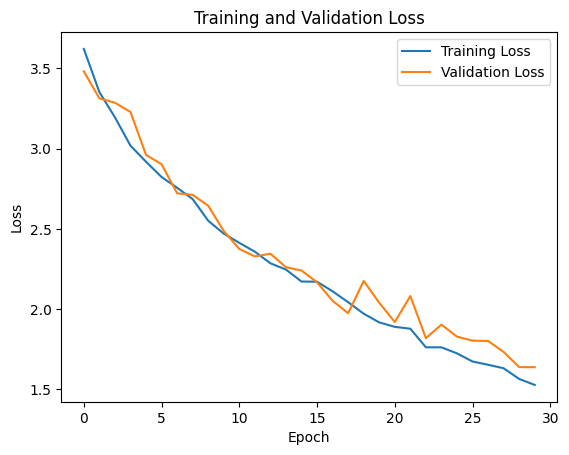

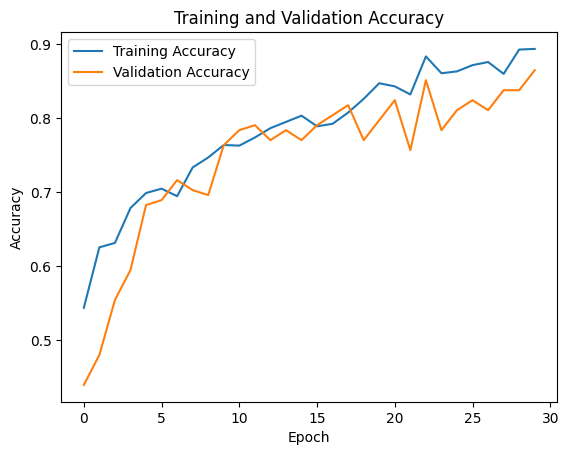

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

5/5 [==============================] - 2s 135ms/step
=== Metrics for Male Subset ===
Accuracy: 0.8292682926829268
Confusion Matrix:
[[31  6]
 [ 8 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        37
           1       0.86      0.82      0.84        45

    accuracy                           0.83        82
   macro avg       0.83      0.83      0.83        82
weighted avg       0.83      0.83      0.83        82

=== Metrics for Female Subset ===
Accuracy: 0.7910447761194029
Confusion Matrix:
[[22  9]
 [ 5 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        31
           1       0.78      0.86      0.82        36

    accuracy                           0.79        67
   macro avg       0.79      0.79      0.79        67
weighted avg       0.79      0.79      0.79        67



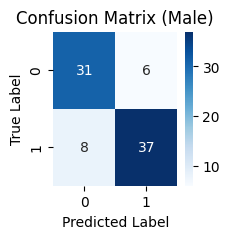

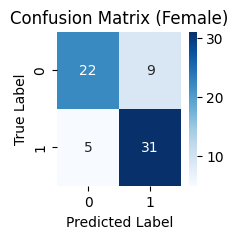

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assume gtest_images, gtest_labels, and gtest_gender are already defined
# where gtest_gender is an array indicating the gender for each test sample

# Generate predictions using the trained model
predictions = model.predict(gtest_images)
predicted_labels = (predictions > 0.5).astype(int).flatten()
# Separate the test set based on gender
male_indices = np.where(gtest_gender == 0)
female_indices = np.where(gtest_gender == 1)

# Predictions and labels for male subset
male_predictions = predicted_labels[male_indices]
male_labels = gtest_labels[male_indices]

# Predictions and labels for female subset
female_predictions = predicted_labels[female_indices]
female_labels = gtest_labels[female_indices]

# Compute metrics for male subset
male_accuracy = np.mean(male_predictions == male_labels)
male_conf_matrix = confusion_matrix(male_labels, male_predictions)
male_classification_report = classification_report(male_labels, male_predictions)

print("=== Metrics for Male Subset ===")
print(f"Accuracy: {male_accuracy}")
print("Confusion Matrix:")
print(male_conf_matrix)
print("Classification Report:")
print(male_classification_report)

# Compute metrics for female subset
female_accuracy = np.mean(female_predictions == female_labels)
female_conf_matrix = confusion_matrix(female_labels, female_predictions)
female_classification_report = classification_report(female_labels, female_predictions)

print("=== Metrics for Female Subset ===")
print(f"Accuracy: {female_accuracy}")
print("Confusion Matrix:")
print(female_conf_matrix)
print("Classification Report:")
print(female_classification_report)

# Plot confusion matrix for male subset
plt.figure(figsize=(2, 2))
sns.heatmap(male_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(gtest_labels), yticklabels=np.unique(gtest_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Male)')
plt.show()

# Plot confusion matrix for female subset
plt.figure(figsize=(2, 2))
sns.heatmap(female_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(gtest_labels), yticklabels=np.unique(gtest_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Female)')
plt.show()





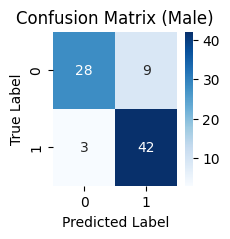

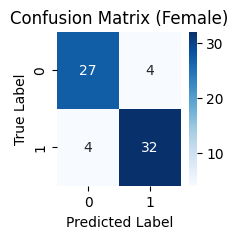

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assume gtest_images, gtest_labels, and gtest_gender are already defined
# where gtest_gender is an array indicating the gender for each test sample








male_conf_matrix=np.array([[28,9],
                          [3,42]])
male_labels=['0','1']
female_conf_matrix=np.array([[27,4],
                          [4,32]])
female_labels=['0','1']

# Plot confusion matrix for male subset
plt.figure(figsize=(2, 2))
sns.heatmap(male_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(male_labels), yticklabels=np.unique(male_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Male)')
plt.show()

# Plot confusion matrix for female subset
plt.figure(figsize=(2, 2))
sns.heatmap(female_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(female_labels), yticklabels=np.unique(female_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Female)')
plt.show()





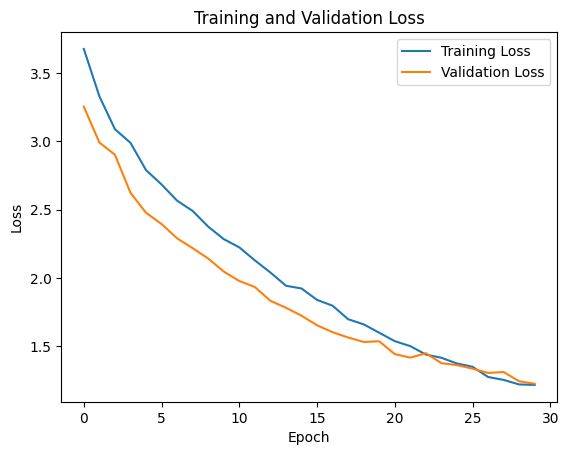

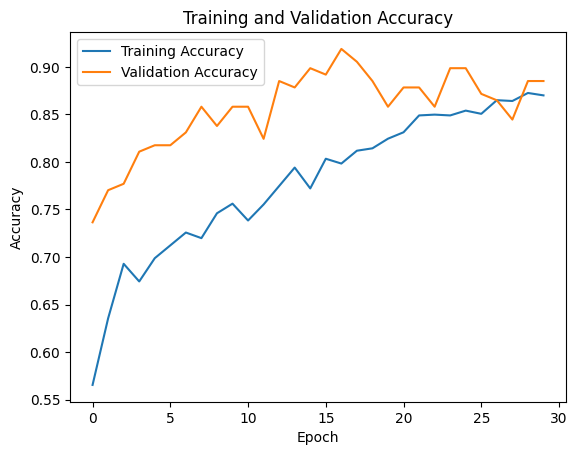

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

5/5 [==============================] - 1s 85ms/step
Validation accuracy during inference: 0.7449664429530202
=== Confusion Matrix ===
[[54 14]
 [24 57]]




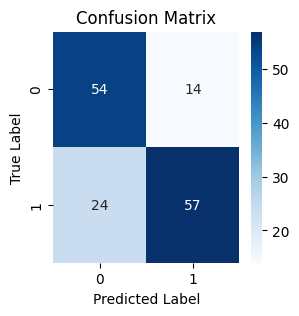

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        68
           1       0.80      0.70      0.75        81

    accuracy                           0.74       149
   macro avg       0.75      0.75      0.74       149
weighted avg       0.75      0.74      0.75       149





In [ ]:
# Make predictions using your model
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Generate predictions using the trained model
predictions = model.predict(mtest_images)
#print(predictions)
# Convert probability predictions to class labels
predicted_labels = (predictions > 0.5).astype(int)

# Evaluate the performance on the validation set
accuracy = np.mean(predicted_labels.flatten() == mtest_labels)
print("Validation accuracy during inference:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(mtest_labels, predicted_labels)

# Print confusion matrix
print("=== Confusion Matrix ===")
print(conf_matrix)
print('\n')

# Plot confusion matrix using seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(mtest_labels), yticklabels=np.unique(mtest_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("=== Classification Report ===")
print(classification_report(mtest_labels, predicted_labels,digits=2))
print('\n')


5/5 [==============================] - 1s 66ms/step
Validation accuracy during inference: 0.8389261744966443
=== Confusion Matrix ===
[[56 12]
 [12 69]]




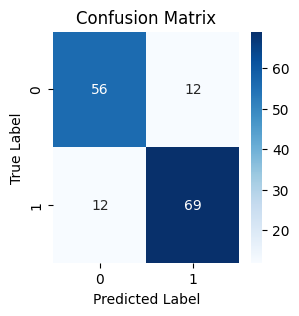

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        68
           1       0.85      0.85      0.85        81

    accuracy                           0.84       149
   macro avg       0.84      0.84      0.84       149
weighted avg       0.84      0.84      0.84       149





In [ ]:
# Make predictions using your model
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Generate predictions using the trained model
predictions = model.predict(test_images)
#print(predictions)
# Convert probability predictions to class labels
predicted_labels = (predictions > 0.5).astype(int)

# Evaluate the performance on the validation set
accuracy = np.mean(predicted_labels.flatten() == test_labels)
print("Validation accuracy during inference:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Print confusion matrix
print("=== Confusion Matrix ===")
print(conf_matrix)
print('\n')

# Plot confusion matrix using seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("=== Classification Report ===")
print(classification_report(test_labels, predicted_labels,digits=2))
print('\n')


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from seaborn import heatmap
import matplotlib.pyplot as plt
import seaborn as sns
# Predict class probabilities and convert them to class labels
probabilities = model.predict(mtest_images)
predicted_classes = np.argmax(probabilities, axis=1)

# Convert one-hot encoded test labels back to class labels
true_classes = np.argmax(mtest_labels, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Compute per-class accuracy
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
for i, class_accuracy in enumerate(class_accuracies):
    print(f"Accuracy for class {i}: {class_accuracy * 100:.2f}%")

# Print classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=[f'Class {i}' for i in range(5)]))

# Plot confusion matrix using seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_classes), yticklabels=np.unique(true_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("=== Classification Report ===")
print(classification_report(true_classes, predicted_classes,digits=2))
print('\n')


3/3 [==============================] - 0s 117ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
pip install git

ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git


In [ ]:
!git remote add origin https://github.com/SophinaLuitel/aet.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import keras_tuner as kt

# Set random seeds for reproducibility
seed_value = 0
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

def build_model(hp):
    # Define input shape for the spectrogram data
    spectrogram_height = 32
    spectrogram_width = 32
    input_shape = (spectrogram_height, spectrogram_width, 3)

    # Create an input layer for the spectrogram data
    input_layer = Input(shape=input_shape)

    # Define hyperparameters
    num_layers = hp.Int('num_layers', min_value=2, max_value=8, step=2)
    num_heads = hp.Int('num_heads', min_value=2, max_value=8, step=2)
    d_model = hp.Int('d_model', min_value=32, max_value=128, step=32)
    dff = hp.Int('dff', min_value=64, max_value=256, step=64)
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    learning_rate =1e-4 # hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='LOG')


    # Create an instance of the Transformer model
    transformer_model = Transformer(
        num_layers=num_layers,
        num_heads=num_heads,
        d_model=d_model,
        dff=dff,
        input_image_shape=input_shape,
        output_dim=5,
        dropout_rate=dropout_rate,

    )

    # Build the model
    output = transformer_model(input_layer)
    model = Model(inputs=input_layer, outputs=output)

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate, clipnorm=1)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# Initialize the tuner
from keras_tuner import BayesianOptimization
#tuner = BayesianOptimization(
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='hyperparam_tuning',
    project_name='transformer_tuning'
)

# Prepare your training data (replace with your actual data)
# X_train, y_train = ...
# X_val, y_val = ...

# Perform the search
tuner.search(train_dataset, epochs=20, validation_data=val_dataset, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Print a summary of the best model
best_model.summary()
# Evaluate on test data
test_loss, test_accuracy = best_model.evaluate(test_dataset)

# Print results
print(f"Test Accuracy: {test_accuracy}")


Trial 10 Complete [00h 23m 54s]
val_accuracy: 0.5917431116104126

Best val_accuracy So Far: 0.60550457239151
Total elapsed time: 02h 18m 45s
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 transformer (Transformer)   (None, 5)                 1437573   
                                                                 
Total params: 1437573 (5.48 MB)
Trainable params: 1306501 (4.98 MB)
Non-trainable params: 131072 (512.00 KB)
_________________________________________________________________
14/14 [==============================] - 5s 213ms/step - loss: 7.7448 - accuracy: 0.6376
Test Accuracy: 0.6376146674156189
